# 4.2.1 Introduction to GPS Tracking of Birds
- Learn how GPS data can be used to track bird migration patterns

In [42]:
import pandas as pd

birddata = pd.read_csv("https://courses.edx.org/assets/courseware/v1/6184eb0f87c7b58db1a5c336e436ed09/asset-v1:HarvardX+PH526x+2T2020+type@asset+block/bird_tracking.csv", index_col =0)
birddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [43]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


# 4.2.2 Simple Data Visualizations:
- Learn how to plot latitude and longitude on a simple 2D plot


In [44]:
import matplotlib.pyplot as plt
import numpy as np 

In [45]:
ix =birddata["bird_name"] == "Eric"

In [46]:
x,y = birddata.longitude[ix], birddata.latitude[ix] 

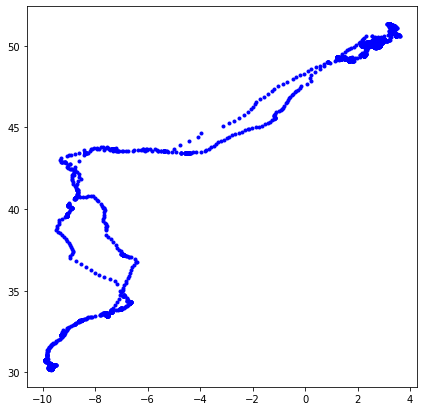

In [47]:
plt.figure(figsize=(7,7))
plt.plot(x,y, "b.")

In [48]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

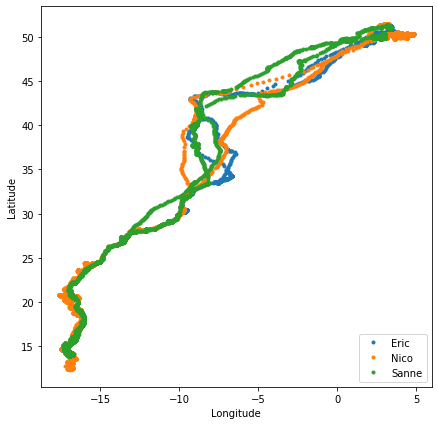

In [49]:
plt.figure(figsize=(7,7))

for bird_name in bird_names:
  ix = birddata["bird_name"] == bird_name
  x,y = birddata.longitude[ix], birddata.latitude[ix] 
  plt.plot(x,y, ".", label = bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

# plt.savefig("3traj.pdf")

# 4.2.3: Examining Flight Speed
- Learn how to examine 2D flight speed of the birds
- Learn how to deal with data entries that are not numeric

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

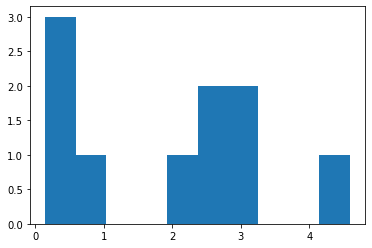

In [50]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed[:10])

In [51]:
print(np.any(np.isnan(speed)))
print(np.sum(np.isnan(speed)== True))

True
85


In [52]:
ind = np.isnan(speed)
ind

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [53]:
~ind

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

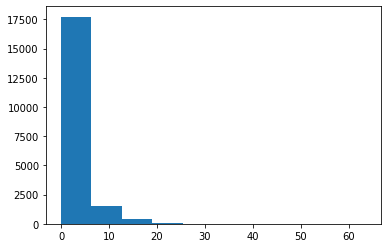

In [54]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])

# plt.savefig("hist.pdf")

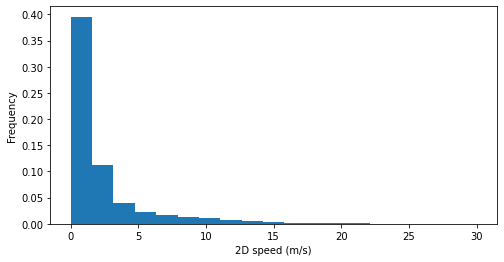

In [55]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), density = True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

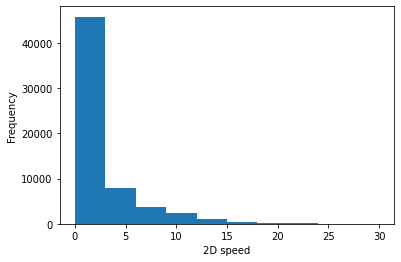

In [56]:
# Histogram with pandas

birddata.speed_2d.plot(kind ="hist", range=[0,30])
plt.xlabel("2D speed");
#plt.savefig("pd_hist.pdf")

# 4.2.4: Using Datetime
- Learn how deal with timestamped data using datetime
- Learn how to measure elapsed time

In [59]:
birddata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [58]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [60]:
import datetime 
datetime.datetime.today()

datetime.datetime(2020, 12, 22, 10, 24, 2, 722053)

In [61]:
time_1 = datetime.datetime.today()

In [62]:
time_2 = datetime.datetime.today()

In [64]:
# Output - datetime.timedelta object
time_2 - time_1

datetime.timedelta(0, 9, 715695)

In [65]:
date_str = birddata.date_time[0]

type(date_str)

str

In [66]:
date_str

'2013-08-15 00:18:08+00'

In [69]:
date_str[:-3]

'2013-08-15 00:18:08'

In [70]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [74]:
timestamps = []
for k in range(len(birddata)):
  timestamps.append(datetime.datetime.strptime\
                    (birddata.date_time.iloc[k][:-3],"%Y-%m-%d %H:%M:%S"))

timestamps[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [76]:
birddata["timestamp"] = pd.Series(timestamps, index= birddata.index)
birddata.head(3)

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.41986,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.41988,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.42031,2.120885,0.596657,Eric,2013-08-15 01:17:58


In [77]:
birddata.timestamp[4] -birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [78]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time-times[0] for time in times]

In [81]:
elapsed_time[:3]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50')]

In [82]:
elapsed_time[1000]

Timedelta('12 days 02:02:00')

In [83]:
elapsed_time[1000] / datetime.timedelta(days =1)

12.084722222222222

In [84]:
elapsed_time[1000] / datetime.timedelta(hours =1)

290.03333333333336

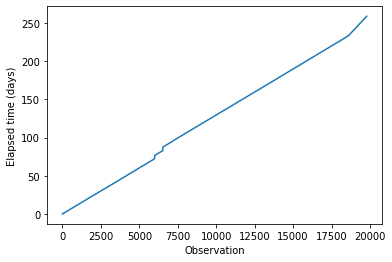

In [85]:
# There are timestamps in our dataset that have irregular distances from one another 
# If there weren't we'd obtain a lineaer plot 

plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");

# plt.savefig("timeplot.pdf")

# 4.2.5: Calculating Daily Mean Speed
- Learn how to calculate and plot daily mean speed


In [87]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time- times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days = 1)

next_day = 1 
inds = []
daily_mean_speed = []

for (i,t) in enumerate(elapsed_days):
  if t < next_day:
    inds.append(i)
  else: 
    # compute mean speed
    daily_mean_speed.append(np.mean(data.speed_2d[inds]))
    next_day += 1
    inds = []

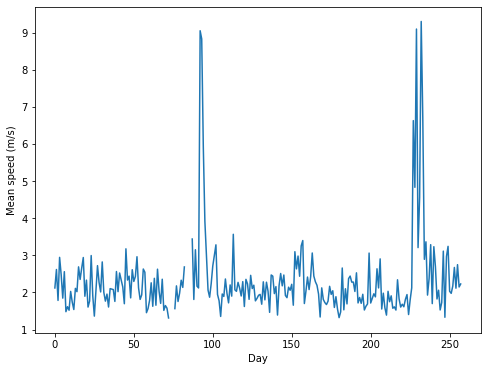

In [88]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");

# plt.savefig("daily_mean_speed.pdf")

Read in the bird_tracking.csv data (provided along with Video 4.2.1) and take a look at Sanne's flight times. Which is the earliest recorded timestamp in the dataset for Sanne?

In [96]:
birddata[birddata.bird_name == "Sanne"]["timestamp"].iloc[0]

Timestamp('2013-08-15 00:01:08')

# 4.2.6: Using the Cartopy Library
- Learn how to download and install Cartopy, a library that provides cartographic tools for Python
- Learn how to use Cartopy to plot data on a cartographic projection

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

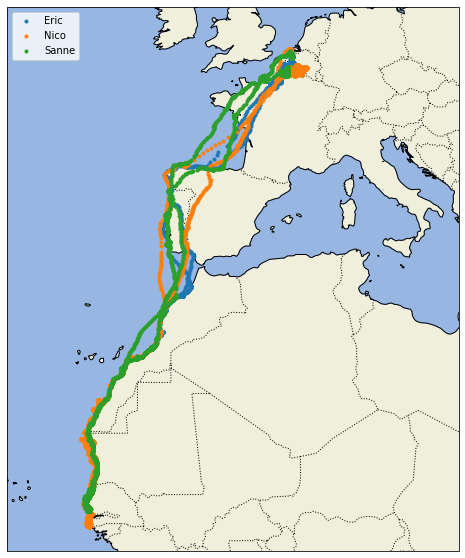

In [111]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ":")

for name in bird_names:
  ix = birddata["bird_name"] == name
  x, y = birddata.longitude[ix], birddata.latitude[ix]
  ax.plot(x, y, ".", transform = ccrs.Geodetic(), label = name)

plt.legend(loc="upper left")

# plt.savefig("map.pdf")